In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split

In [29]:
# Load the OKCupid data
# Downloaded on January 18 from https://github.com/rudeboybert/JSE_OkCupid/blob/master/profiles_revised.csv.zip

df = pd.read_csv("profiles_revised.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  offspring    24385 non-null  object 
 11  orientation  59946 non-null  object 
 12  pets         40025 non-null  object 
 13  religion     39720 non-null  object 
 14  sex          59946 non-null  object 
 15  sign         48890 non-null  object 
 16  smokes       54434 non-null  object 
 17  speaks       59896 non-null  object 
 18  status       59946 non-null  object 
dtypes: f

In [31]:
# before we go too far, split!
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [32]:
# How many values in each category?
print("Feature     Count")
# Assuming that object is categorical, could be bad assumption
for feat in train.select_dtypes(include="object").columns:
    print(f"{feat:12}{train[feat].nunique()}")

Feature     Count
body_type   12
diet        18
drinks      6
drugs       3
education   32
ethnicity   202
job         21
offspring   15
orientation 3
pets        15
religion    45
sex         2
sign        48
smokes      5
speaks      6397
status      5


In [ ]:
df["status"].value_counts()
stat_enc = OneHotEncoder(sparse_output=False)
stat_one_hot = stat_enc.fit_transform(df[["status"]])
print(df["status"][:5])
print(stat_one_hot[:5, :])

0       single
1       single
2    available
3       single
4       single
Name: status, dtype: object
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [33]:
# What's going with speaks?
train["speaks"].head(10)

8414                                    english (fluently)
35088                                   english (fluently)
24943                                              english
33238                                   english (fluently)
195                                     english (fluently)
47822                                      english, french
42973    english (fluently), french (okay), spanish (po...
2705           english, italian (poorly), spanish (poorly)
22013                   english (okay), italian (fluently)
17466                                  english, vietnamese
Name: speaks, dtype: object

In [62]:
# look at drinks category
print(train["drinks"].value_counts())
cats = train["drinks"].value_counts().index
# pass a specific list in the order you want encoded
drink_enc = OrdinalEncoder(categories=[cats])
drink_ord = drink_enc.fit_transform(train[["drinks"]])



for name, o in zip(train["drinks"], drink_ord):
    print(name, o)

drinks
socially       33512
rarely          4745
often           4100
not at all      2605
very often       386
desperately      258
Name: count, dtype: int64


ValueError: Found unknown categories [nan] in column 0 during fit

In [ ]:
# Drop nans for demonstration purposes
nona_speaks = train["speaks"].dropna()
encoder = FeatureHasher(n_features=8, input_type="string")
encoded_speaks = encoder.fit_transform(nona_speaks.str.split(", "))

In [ ]:
for s, e in zip(nona_speaks[:5], encoded_speaks[:5]):
    print(f"{s}: {e.todense()}")

In [53]:
# income vs education
train.groupby("education")["income"].describe()
edu_encoder = TargetEncoder(target_type="continuous")
edu_feat = edu_encoder.fit_transform(train[["education"]],train["income"])

# Look at the target-encoded values
print(f"{'Education':35} Income")
for cat, enc in sorted(zip(edu_encoder.categories_[0], edu_encoder.encodings_[0]), key=lambda e: e[1], reverse=True):
    print(f"{cat:35} ${enc:,.2f}")

Education                           Income
dropped out of space camp           $86,617.96
dropped out of high school          $71,198.65
working on space camp               $67,615.92
dropped out of law school           $66,943.65
space camp                          $66,757.09
graduated from space camp           $65,134.96
dropped out of ph.d program         $44,703.36
dropped out of college/university   $34,593.36
working on high school              $32,764.00
dropped out of masters program      $30,436.46
dropped out of two-year college     $27,162.75
graduated from ph.d program         $25,132.76
graduated from high school          $24,411.07
masters program                     $23,829.96
college/university                  $22,539.55
graduated from med school           $20,744.09
working on college/university       $19,849.27
working on ph.d program             $19,326.72
graduated from two-year college     $18,842.08
high school                         $18,738.60
graduated from co

<Axes: >

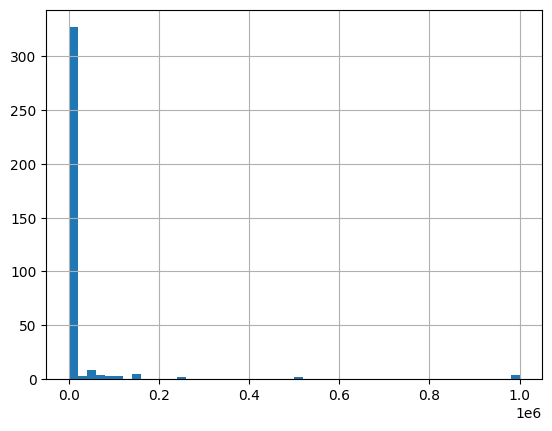

In [68]:
train.query("education == 'graduated from med school'")["income"].hist(bins=50)